In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def read_file(filename):
        
        try:
            with open(filename, 'r') as file:
                content = pd.read_csv(filename,sep='\t',header=None)
                content.columns = ["datatype","targettype","RunID","energy","incoming_ions","zero_inside","zero_outside","up_inside","up_outside","down_inside","down_outside"]
        except FileNotFoundError:
            print(f"Error: File '{filename}' not found.")
        except Exception as e:
            print(f"Error: An unexpected error occurred - {e}")
        print(content)
        return content
            

            



In [2]:
#table = read_file("final_check_twim_zero.txt")
#table = read_file("final_less_5_pads_zero_ch_twim.txt")
#table = read_file("large_twim_window.txt")


table = read_file("lazy_mon_twim.txt")

   datatype targettype      RunID  energy  incoming_ions  zero_inside  \
0       exp     c_1086  0181_0001     400      1224240.0          409   
1       exp     c_1086  0101_0001     550       973221.0           61   
2       exp     c_1086  0127_0001     650      1062810.0          157   
3       exp     c_1086  0168_0001     800       653396.0           73   
4       exp     c_2198  0183_0001     400      1329940.0          489   
5       exp     c_2198  0103_0001     550       952467.0           68   
6       exp     c_2198  0130_0001     650      1100960.0          227   
7       exp     c_2198  0170_0001     800       900439.0          151   
8       exp       c_54  0179_0001     400      1149420.0          407   
9       exp       c_54  0099_0001     550      1036550.0           65   
10      exp       c_54  0126_0001     650      1102020.0          137   
11      exp       c_54  0166_0001     800       756845.0          137   
12      exp      empty  0187_0001     400      1149

In [3]:
table['zero_in_p'] =  table["zero_inside"]/table["incoming_ions"]*100

# Poisson error of zero_inside: sqrt(N)
table['zero_sigma'] = np.sqrt(table['zero_inside'])

# Propagate the error to the percentage: σ_rel = sqrt(N)/incoming_ions
table['zero_in_p_error'] = (table['zero_sigma'] / table['incoming_ions']) * 100

Text(0, 0.5, 'relative to incoming ions [%]')

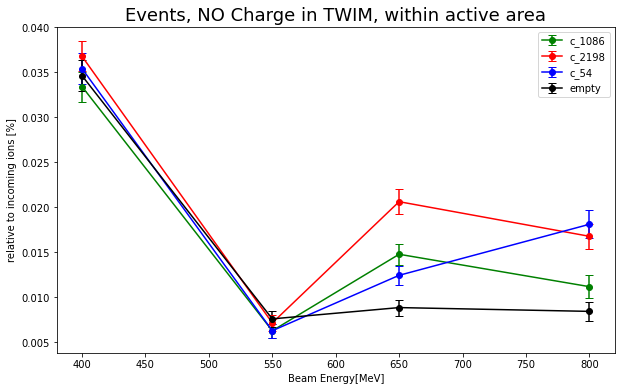

In [4]:
targettypes = table['targettype'].unique()
colors = ["green","red","blue","black"]

plt.figure(figsize=(10, 6))

for i, target in enumerate(targettypes):
    subset = table[table['targettype'] == target]
    plt.errorbar(
        subset['energy'],
        subset['zero_in_p'],
        yerr=subset['zero_in_p_error'],
        fmt='o-',
        label=target,
        color=colors[i],
        capsize=4
    )
plt.legend()
plt.title("Events, NO Charge in TWIM, within active area",fontsize=18)
plt.xlabel("Beam Energy[MeV]")
plt.ylabel("relative to incoming ions [%]")

In [5]:
table['zero_out_p'] =  table["zero_outside"]/table["incoming_ions"]*100

# Poisson error of zero_inside: sqrt(N)
table['zero_sigma_out'] = np.sqrt(table['zero_outside'])

# Propagate the error to the percentage: σ_rel = sqrt(N)/incoming_ions
table['zero_out_p_error'] = (table['zero_sigma_out'] / table['incoming_ions']) * 100

Text(0, 0.5, 'relative to incoming ions [%]')

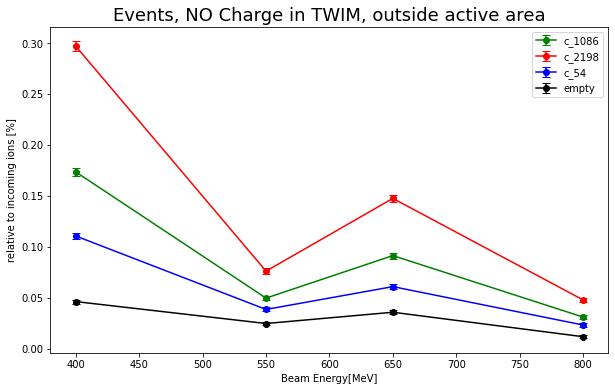

In [6]:
targettypes = table['targettype'].unique()
colors = ["green","red","blue","black"]

plt.figure(figsize=(10, 6))

for i, target in enumerate(targettypes):
    subset = table[table['targettype'] == target]
    plt.errorbar(
        subset['energy'],
        subset['zero_out_p'],
        yerr=subset['zero_out_p_error'],
        fmt='o-',
        label=target,
        color=colors[i],
        capsize=4
    )
plt.legend()
plt.title("Events, NO Charge in TWIM, outside active area",fontsize=18)
plt.xlabel("Beam Energy[MeV]")
plt.ylabel("relative to incoming ions [%]")

In [7]:
table['up_in_p'] =  table["up_inside"]/table["incoming_ions"]*100

# Poisson error of zero_inside: sqrt(N)
table['up_sigma_in'] = np.sqrt(table['up_inside'])

# Propagate the error to the percentage: σ_rel = sqrt(N)/incoming_ions
table['up_in_p_error'] = (table['up_sigma_in'] / table['incoming_ions']) * 100

Text(0, 0.5, 'relative to incoming ions [%]')

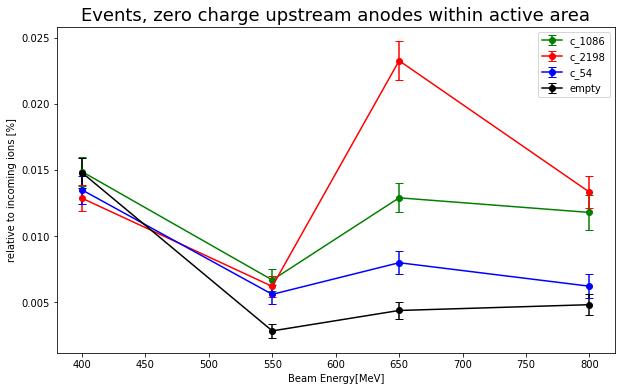

In [8]:
targettypes = table['targettype'].unique()
colors = ["green","red","blue","black"]

plt.figure(figsize=(10, 6))

for i, target in enumerate(targettypes):
    subset = table[table['targettype'] == target]
    plt.errorbar(
        subset['energy'],
        subset['up_in_p'],
        yerr=subset['up_in_p_error'],
        fmt='o-',
        label=target,
        color=colors[i],
        capsize=4
    )
plt.legend()
plt.title("Events, zero charge upstream anodes within active area",fontsize=18)
plt.xlabel("Beam Energy[MeV]")
plt.ylabel("relative to incoming ions [%]")

In [9]:
table['up_out_p'] =  table["up_outside"]/table["incoming_ions"]*100

# Poisson error of zero_inside: sqrt(N)
table['up_sigma_out'] = np.sqrt(table['up_outside'])

# Propagate the error to the percentage: σ_rel = sqrt(N)/incoming_ions
table['up_out_p_error'] = (table['up_sigma_out'] / table['incoming_ions']) * 100

Text(0, 0.5, 'relative to incoming ions [%]')

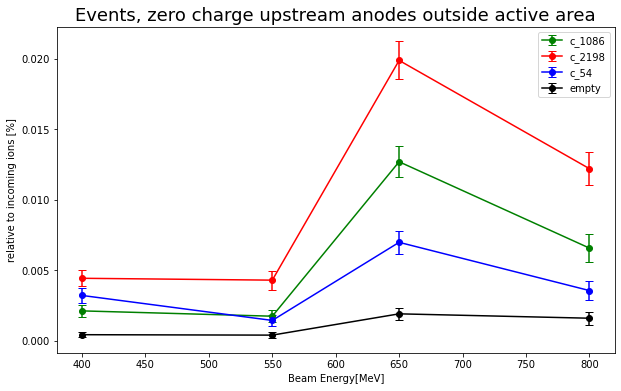

In [10]:
targettypes = table['targettype'].unique()
colors = ["green","red","blue","black"]

plt.figure(figsize=(10, 6))

for i, target in enumerate(targettypes):
    subset = table[table['targettype'] == target]
    plt.errorbar(
        subset['energy'],
        subset['up_out_p'],
        yerr=subset['up_out_p_error'],
        fmt='o-',
        label=target,
        color=colors[i],
        capsize=4
    )
plt.legend()
plt.title("Events, zero charge upstream anodes outside active area",fontsize=18)
plt.xlabel("Beam Energy[MeV]")
plt.ylabel("relative to incoming ions [%]")

In [11]:
table['down_in_p'] =  table["down_inside"]/table["incoming_ions"]*100

# Poisson error of zero_inside: sqrt(N)
table['down_sigma_in'] = np.sqrt(table['down_inside'])

# Propagate the error to the percentage: σ_rel = sqrt(N)/incoming_ions
table['down_in_p_error'] = (table['down_sigma_in'] / table['incoming_ions']) * 100

Text(0, 0.5, 'relative to incoming ions [%]')

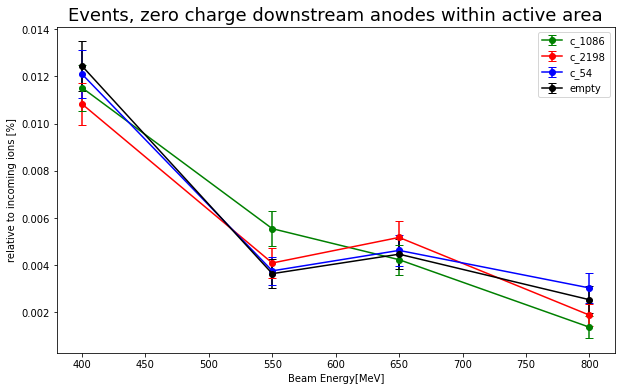

In [12]:
targettypes = table['targettype'].unique()
colors = ["green","red","blue","black"]

plt.figure(figsize=(10, 6))

for i, target in enumerate(targettypes):
    subset = table[table['targettype'] == target]
    plt.errorbar(
        subset['energy'],
        subset['down_in_p'],
        yerr=subset['down_in_p_error'],
        fmt='o-',
        label=target,
        color=colors[i],
        capsize=4
    )
plt.legend()
plt.title("Events, zero charge downstream anodes within active area",fontsize=18)
plt.xlabel("Beam Energy[MeV]")
plt.ylabel("relative to incoming ions [%]")

In [13]:
table['down_out_p'] =  table["down_outside"]/table["incoming_ions"]*100

# Poisson error of zero_inside: sqrt(N)
table['down_sigma_out'] = np.sqrt(table['down_outside'])

# Propagate the error to the percentage: σ_rel = sqrt(N)/incoming_ions
table['down_out_p_error'] = (table['down_sigma_out'] / table['incoming_ions']) * 100

Text(0, 0.5, 'relative to incoming ions [%]')

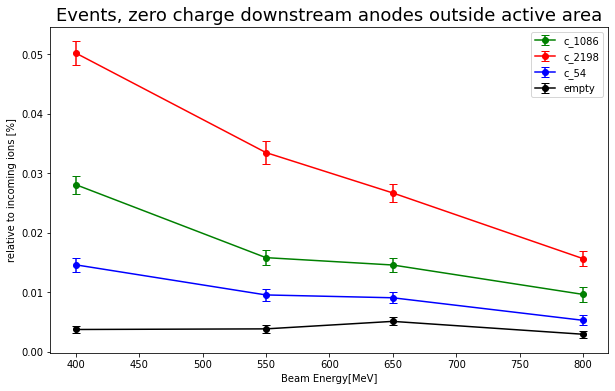

In [14]:
targettypes = table['targettype'].unique()
colors = ["green","red","blue","black"]

plt.figure(figsize=(10, 6))

for i, target in enumerate(targettypes):
    subset = table[table['targettype'] == target]
    plt.errorbar(
        subset['energy'],
        subset['down_out_p'],
        yerr=subset['down_out_p_error'],
        fmt='o-',
        label=target,
        color=colors[i],
        capsize=4
    )
plt.legend()
plt.title("Events, zero charge downstream anodes outside active area",fontsize=18)
plt.xlabel("Beam Energy[MeV]")
plt.ylabel("relative to incoming ions [%]")